# Black Friday Dataset EDA And Feature Engineering



### Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing dataset
df_train=pd.read_csv('blackfriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# import the test dataset
df_test=pd.read_csv('BlackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
1,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN
2,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN
3,1000008,P00303442,M,26-35,12,C,4+,1,1,8.0,14.0
4,1000010,P00182642,F,36-45,1,B,4+,1,2,4.0,9.0


In [4]:
#merge both dataset
df= pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603826 entries, 0 to 53757
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     603826 non-null  int64  
 1   Product_ID                  603826 non-null  object 
 2   Gender                      603826 non-null  object 
 3   Age                         603826 non-null  object 
 4   Occupation                  603826 non-null  int64  
 5   City_Category               603826 non-null  object 
 6   Stay_In_Current_City_Years  603826 non-null  object 
 7   Marital_Status              603826 non-null  int64  
 8   Product_Category_1          603826 non-null  int64  
 9   Product_Category_2          413504 non-null  float64
 10  Product_Category_3          183163 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 59.9+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.038260e+05,603826.000000,603826.000000,603826.000000,413504.000000,183163.000000,550068.000000
mean,1.003026e+06,8.081254,0.409592,5.394668,9.842127,12.669671,9263.968713
std,1.726676e+03,6.522592,0.491759,3.919673,5.086263,4.124608,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001512e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003072e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004473e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.038260e+05,603826,603826,603826,603826.000000,603826,603826,603826.000000,603826.000000,413504.000000,183163.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2091,454848,240979,NaN,253752,212797,NaN,NaN,NaN,NaN,NaN
mean,1.003026e+06,NaN,NaN,NaN,8.081254,NaN,NaN,0.409592,5.394668,9.842127,12.669671,9263.968713
std,1.726676e+03,NaN,NaN,NaN,6.522592,NaN,NaN,0.491759,3.919673,5.086263,4.124608,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001512e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003072e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004473e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [8]:
#Drop column 
df.drop(['User_ID'],axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
53753,P00103042,1,3,14,B,2,1,1,14.0,NaN,NaN
53754,P00113842,1,3,14,B,2,1,6,8.0,16.0,NaN
53755,P00194542,1,2,20,A,1,1,8,14.0,NaN,NaN
53756,P00084842,1,2,20,A,1,1,8,16.0,NaN,NaN


In [12]:
# Fixing city categorical
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [13]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [14]:
df= pd.concat([df,df_city],axis=1)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53753,P00103042,1,3,14,B,2,1,1,14.0,NaN,NaN,1,0
53754,P00113842,1,3,14,B,2,1,6,8.0,16.0,NaN,1,0
53755,P00194542,1,2,20,A,1,1,8,14.0,NaN,NaN,0,0
53756,P00084842,1,2,20,A,1,1,8,16.0,NaN,NaN,0,0


In [15]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
# Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            190322
Product_Category_3            420663
Purchase                       53758
B                                  0
C                                  0
dtype: int64

In [18]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df['Product_Category_2'].value_counts()

8.0     70365
14.0    60472
2.0     54101
16.0    47517
15.0    41606
5.0     28844
4.0     28129
6.0     18117
11.0    15586
17.0    14621
13.0    11569
9.0      6256
12.0     6085
10.0     3359
3.0      3155
18.0     3036
7.0       686
Name: Product_Category_2, dtype: int64

In [20]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
## Focus on replacing missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].value_counts()

16.0    35757
15.0    30737
14.0    20244
17.0    18381
5.0     18285
8.0     13809
9.0     12727
12.0    10129
13.0     6044
6.0      5352
18.0     5111
4.0      2050
11.0     1984
10.0     1886
3.0       667
Name: Product_Category_3, dtype: int64

In [24]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53753,P00103042,1,3,14,2,1,1,14.0,16.0,NaN,1,0
53754,P00113842,1,3,14,2,1,6,8.0,16.0,NaN,1,0
53755,P00194542,1,2,20,1,1,8,14.0,16.0,NaN,0,0
53756,P00084842,1,2,20,1,1,8,16.0,16.0,NaN,0,0


In [26]:
df.shape

(603826, 12)

In [27]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\rahul\AppData\Local\Temp\ipykernel_5904\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [29]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53753,P00103042,1,3,14,2,1,1,14.0,16.0,NaN,1,0
53754,P00113842,1,3,14,2,1,6,8.0,16.0,NaN,1,0
53755,P00194542,1,2,20,1,1,8,14.0,16.0,NaN,0,0
53756,P00084842,1,2,20,1,1,8,16.0,16.0,NaN,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603826 entries, 0 to 53757
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  603826 non-null  object 
 1   Gender                      603826 non-null  int64  
 2   Age                         603826 non-null  int64  
 3   Occupation                  603826 non-null  int64  
 4   Stay_In_Current_City_Years  603826 non-null  object 
 5   Marital_Status              603826 non-null  int64  
 6   Product_Category_1          603826 non-null  int64  
 7   Product_Category_2          603826 non-null  float64
 8   Product_Category_3          603826 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           603826 non-null  uint8  
 11  C                           603826 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 51.8+ MB


In [31]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603826 entries, 0 to 53757
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  603826 non-null  object 
 1   Gender                      603826 non-null  int64  
 2   Age                         603826 non-null  int64  
 3   Occupation                  603826 non-null  int64  
 4   Stay_In_Current_City_Years  603826 non-null  int32  
 5   Marital_Status              603826 non-null  int64  
 6   Product_Category_1          603826 non-null  int64  
 7   Product_Category_2          603826 non-null  float64
 8   Product_Category_3          603826 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           603826 non-null  uint8  
 11  C                           603826 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 49.5

In [32]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603826 entries, 0 to 53757
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  603826 non-null  object 
 1   Gender                      603826 non-null  int64  
 2   Age                         603826 non-null  int64  
 3   Occupation                  603826 non-null  int64  
 4   Stay_In_Current_City_Years  603826 non-null  int32  
 5   Marital_Status              603826 non-null  int64  
 6   Product_Category_1          603826 non-null  int64  
 7   Product_Category_2          603826 non-null  float64
 8   Product_Category_3          603826 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           603826 non-null  int32  
 11  C                           603826 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 53.0+ MB


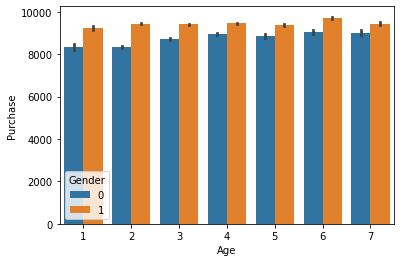

In [35]:
##Visualisation Age vs Purchased
sns.barplot(x='Age', y='Purchase',hue='Gender', data=df);

#### Purchasing of men is high then women

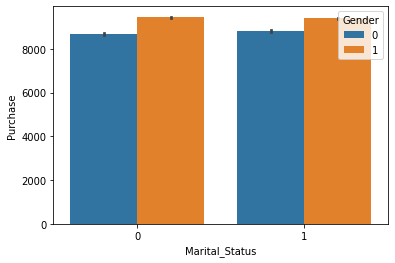

In [49]:
##Visualisation Purchase vs Marital_status
sns.barplot(x='Marital_Status', y='Purchase',hue='Gender', data=df);

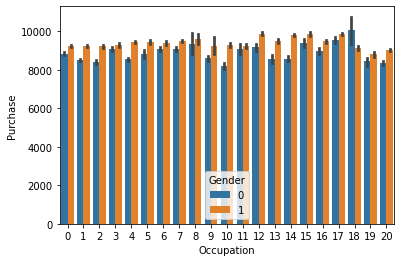

In [36]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender', data=df);

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

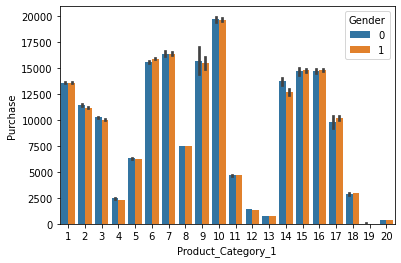

In [38]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

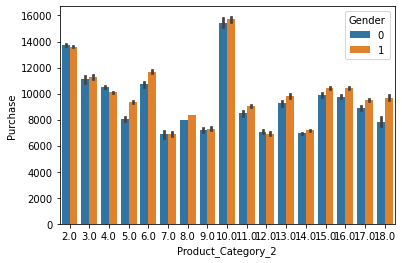

In [39]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

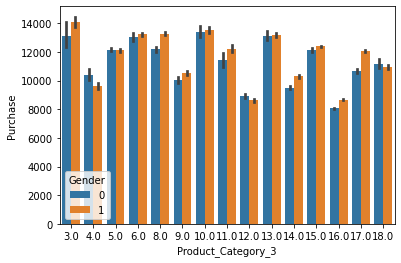

In [40]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [41]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [42]:
##Feature Scaling 
# Row which are null stored in test
df_test=df[df['Purchase'].isnull()]

In [43]:
#row which are not null store in train
df_train=df[~df['Purchase'].isnull()]

In [44]:
X=df_train.drop('Purchase',axis=1)

In [45]:
X.shape

(550068, 11)

In [46]:
y=df_train['Purchase']

In [47]:
y.shape

(550068,)

#### After this train test split and start your model making. We can remove Product_ID as that doesn't affect our dataset.  

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [54]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)